Deep Neural Networks

Deep neural networks have tremendous potential to learn complex non-linear functions, patterns, and representations. This includes real-world applications like image categorization and classification and the very popular concept of image artistic style transfer. Computer vision is all about the art and science of making machines understand high-level useful patterns and representations from images and videos so that it would be able to make intelligent decisions similar to what a human would do upon observing its surroundings.

Convolutional neural networks or CNNs are extensively used for automated feature extraction in images. In fact, CNNs are similar to the general deep neural networks, but with explicit assumption of input being a data set where which the location of a feature is relevant can be attempted via CNNs like image, but not limited to then.

A CNN is made up of Layers: Every Layer has a simple API: It transforms an input 3D volume to an output 3D volume with some differentiable function that may or may not have parameters. the main layers are:
Convolutional Layer: Is a set of slides or convolves learnable filters, also known as kernels or convolution matrix, to help capture spatial features. These cover the width, height and the full depth (color range) of the image. During the forward pass, we slide the filter across the width and the height of the image while computing the dot product between the filter attributes and the input at any position. The output is a two-dimensional activation map from each filter, which are then stacked to get the final output.
Pooling Layer: These are basically down-sampling layers used to reduce spatial size and number of parameters by apply functions such as max, average, L2-norm, and so on. These layers also help in controlling overfitting. These layers are insert in between conv layers or in the end of a sequence of them.
Fully Connected Layer: This layer helps perform the tasks of classification. It is similar to fully connected layers in general neural networks. These have full connections to all neurons in the previous layer and can followed by a Dropout to help to reduce overfit.
Parameter Sharing: Conv layers use same set of weights across the filters thus reducing the overall number of parameters required.

Airplane: 0
Car: 1
Cat: 2
Dog: 3
Flower: 4
Fruit: 5
Motorbike: 6
Person: 7

# Abstact

1. Preparing data and loading the packages
2. Loading the dataset
3. Dividing the dataset
4. Part A:Building basic CNN model
5. Part B: Activation Functions (relu, tahn and softmax)
6. Part C: Cost Functions (mean-square error and hinge)
7. Part D: different number of epochs
8. Part E: Gradient estimation (ADAM, Adadelta)
9. Part F: different Network Architecture
10. Part G: Network Initialization (Uniform and zeros)
11. Conclusion
12. Citations
13. License

In [0]:
import numpy as np
import pandas as pd
from skimage import io,exposure
from sklearn.utils import shuffle
import matplotlib.pyplot as plot
import os
from random import randint
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.gridspec as gridspec
from skimage.morphology import disk
from skimage.filters import rank
from skimage.util import img_as_ubyte
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import tensorflow.keras.utils as Utils
import tensorflow as tf
import keras
from keras import models
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Using TensorFlow backend.


In [0]:
%matplotlib inline

In [0]:
pwd

'C:\\Users\\tejas\\Desktop\\ADS\\Assignments\\Assignment 3'

Importing data

In [0]:
image_list=[]
labels=[]
path = 'C:\\Users\\tejas\\Desktop\\ADS\\Assignments\\Assignment 3\\natural-images\\natural_images'

for subdir, dirs, files in os.walk(path):
    for file in files:
        image=io.imread(os.path.join(subdir, file))
        grayscale = rgb2gray(image)
        resized=resize(grayscale, (200, 200))
        image_list.append(resized)
        labels.append(subdir.split('/')[-1])

image_list,labels=shuffle(image_list,labels)

Here using grayscaled images because Its hard to train the data on coloured images. And the information contained in grayscaled images is sufficient for the classification.

In [0]:
plot_images=image_list[:25]
plot_labels=labels[:25]

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


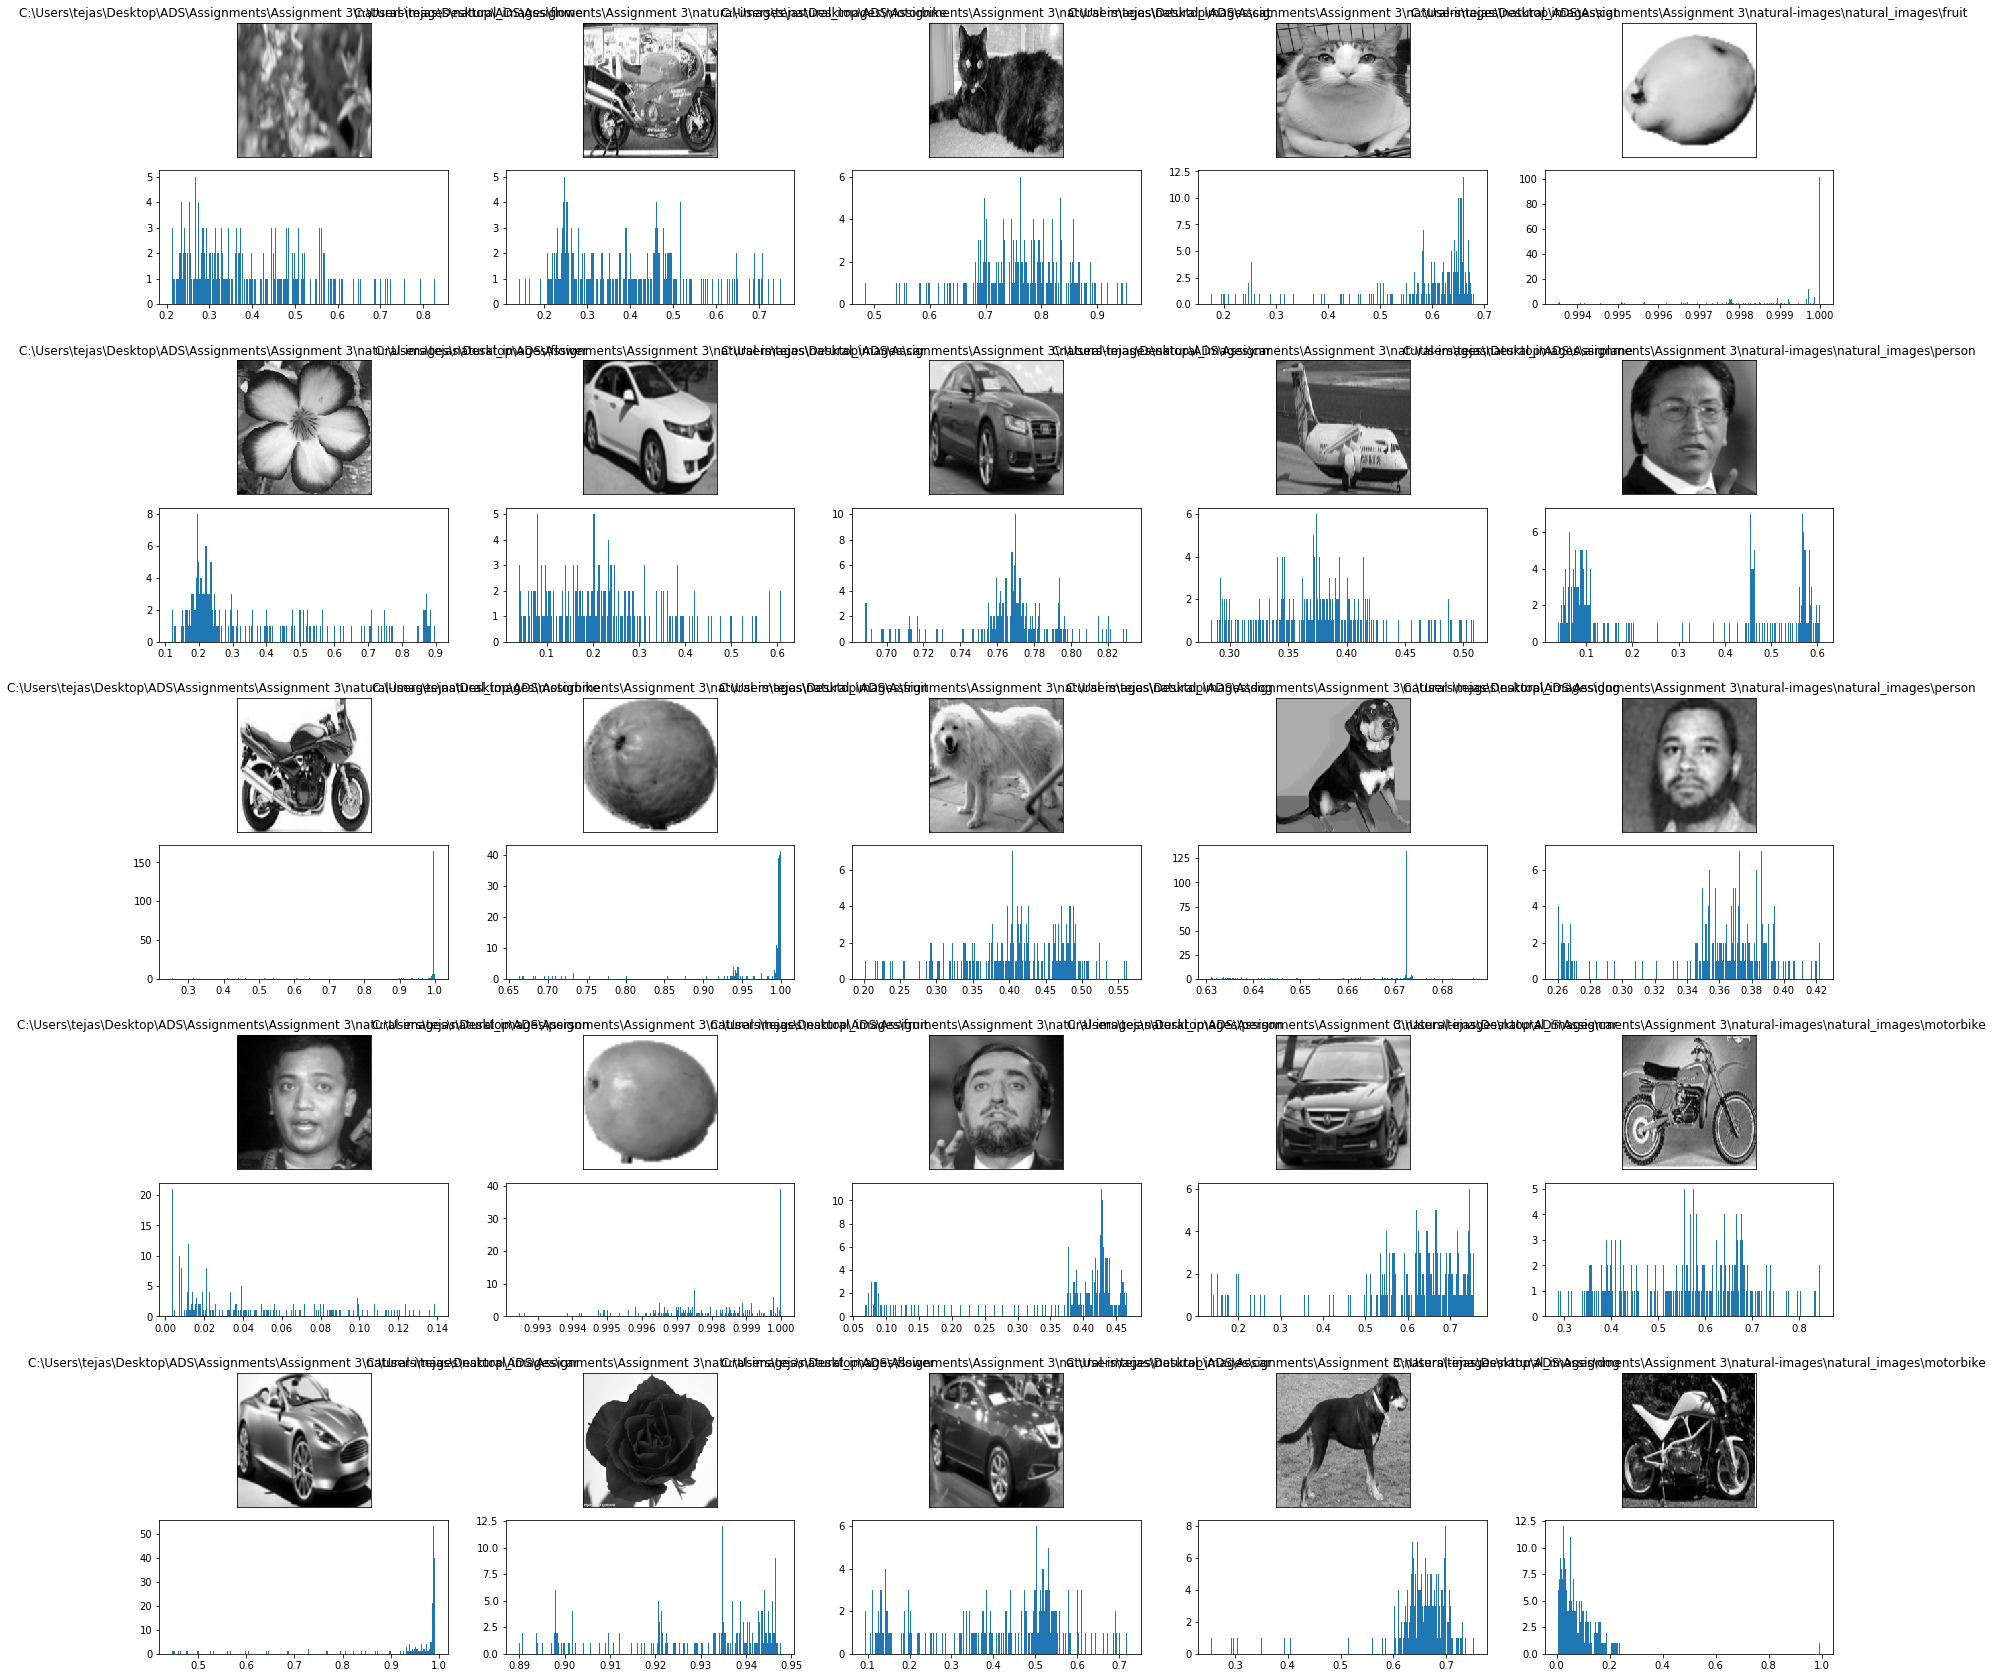

In [0]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)
s=0
for i,k in zip(plot_images,plot_labels):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[s], wspace=0.1, hspace=0.1)
    s+=1
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(i,cmap='gray')
            ax.set_title(k)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.hist(i[0],bins=256,histtype='bar')
            fig.add_subplot(ax)         
fig.show()

Histogram is considered as a graph or plot which is related to frequency of pixels in an Gray Scale Image

In [0]:
random_index = randint(0,len(image_list))


comparison_list = []
comparison_lable = []

#orignal
comparison_list.append(image_list[random_index])
comparison_lable.append("Orignal")

# Contrast stretching
p2, p98 = np.percentile(image_list[random_index], (2, 98))
comparison_list.append(exposure.rescale_intensity(image_list[random_index], in_range=(p2, p98)))
comparison_lable.append("Contrast stretching")


#Global Equalization
comparison_list.append(exposure.equalize_hist(image_list[random_index]))
comparison_lable.append("Equalization")

#local Equalization
selem = disk(60)
comparison_list.append(rank.equalize(img_as_ubyte(image_list[random_index]), selem=selem))
comparison_lable.append("Local Equalization")

# Adaptive Equalization
comparison_list.append(exposure.equalize_adapthist(image_list[random_index], clip_limit=0.3))
comparison_lable.append("Adaptive Equalization")

C:\Users\tejas\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\tejas\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Histogram Equalization is a computer image processing technique used to improve contrast in images. It accomplishes this by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. This method usually increases the global contrast of images when its usable data is represented by close contrast values. This allows for areas of lower local contrast to gain a higher contrast.

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


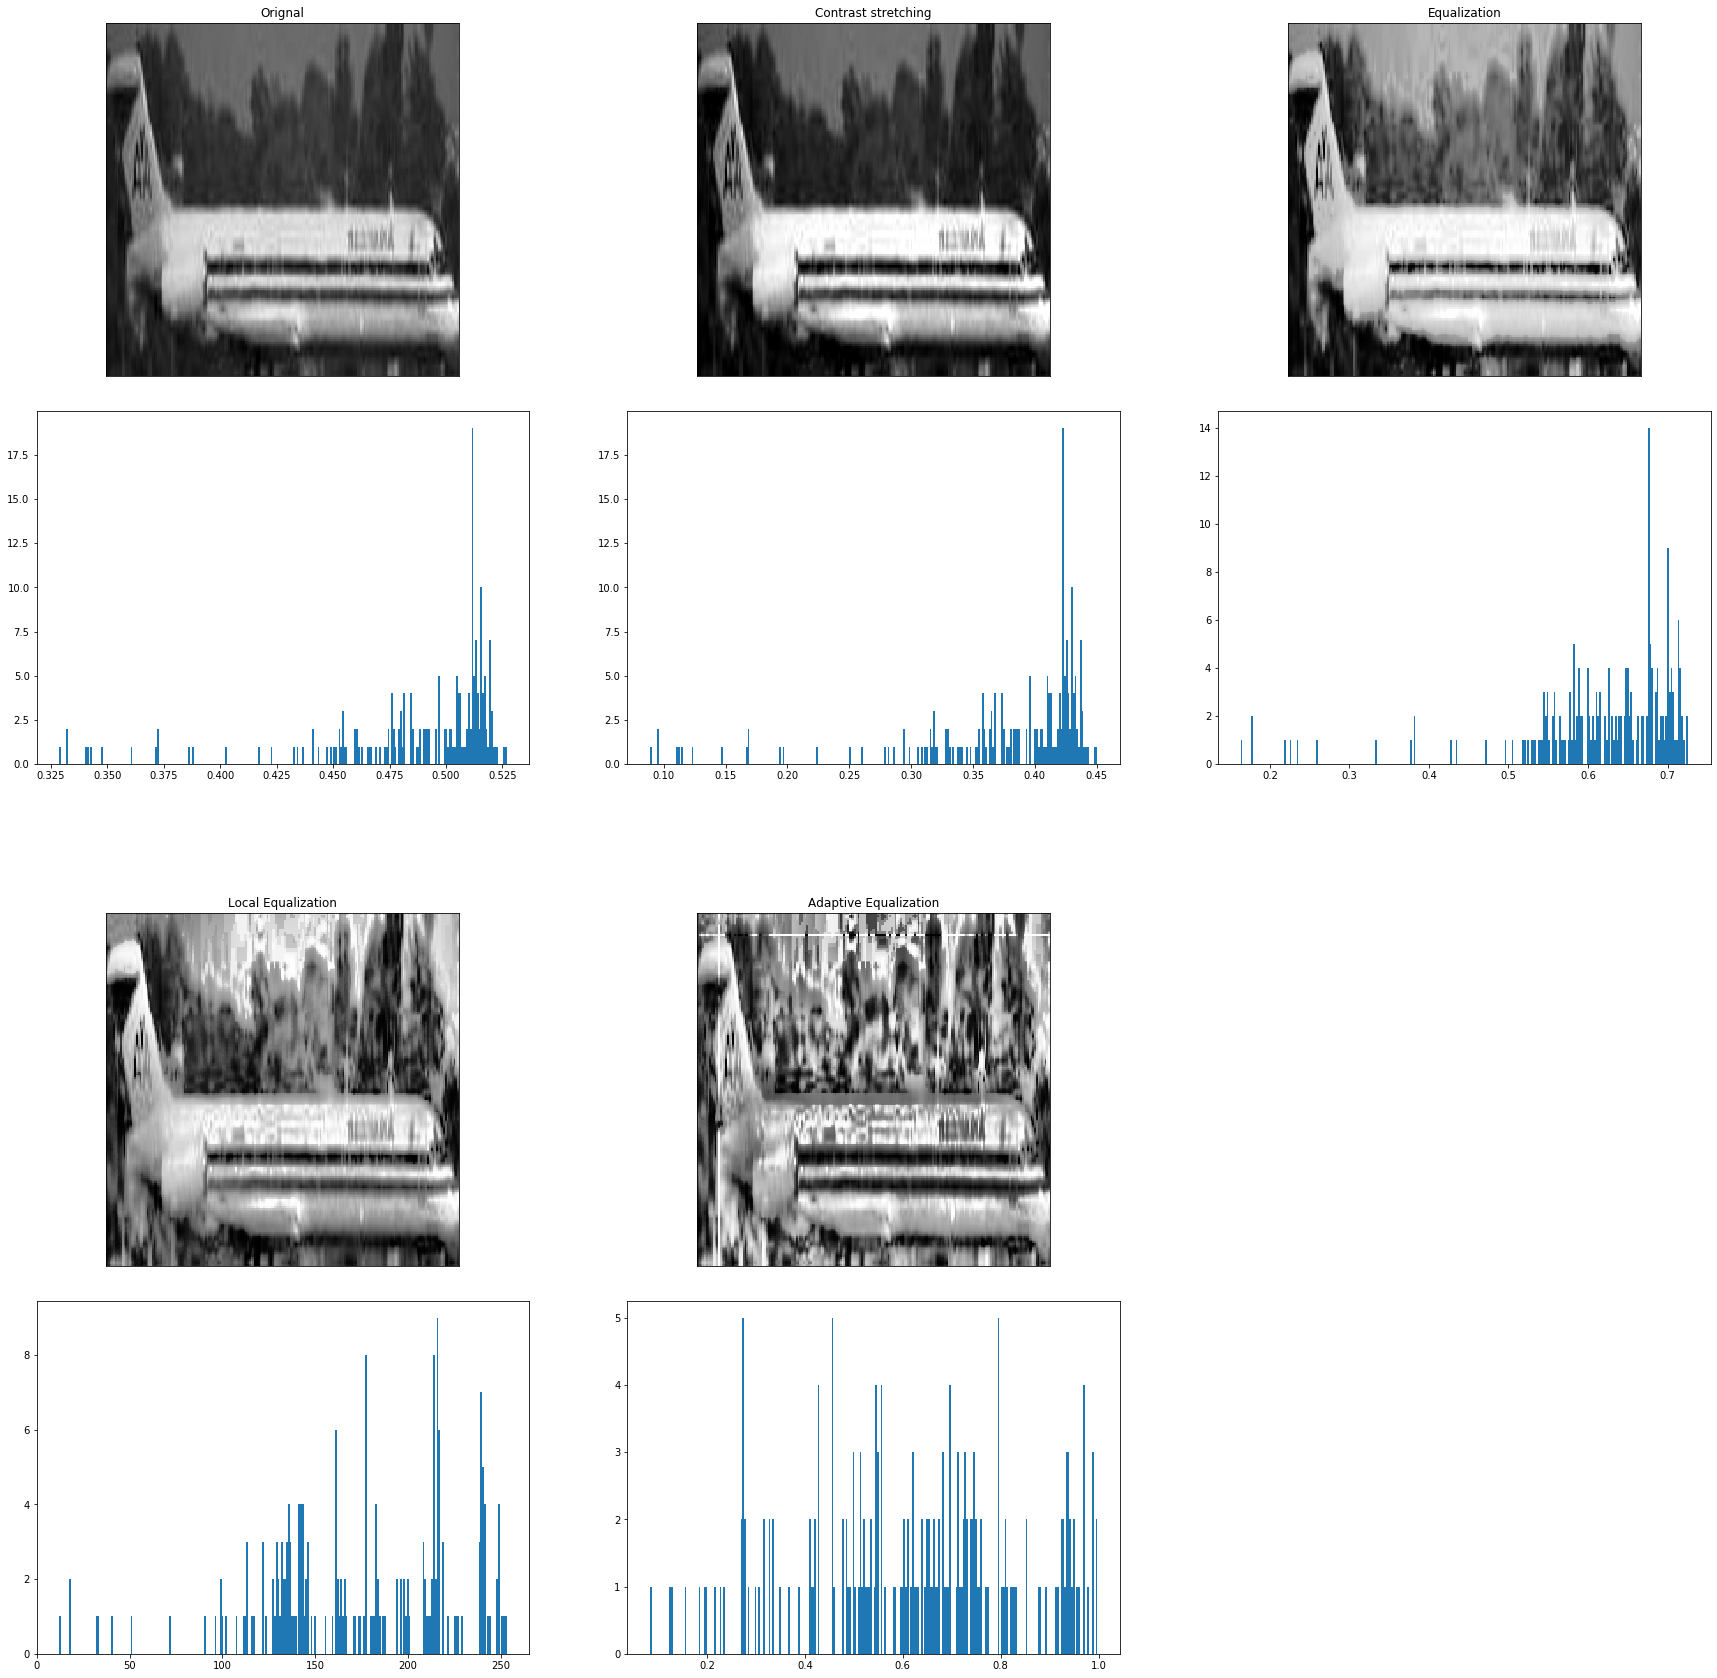

In [0]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(2, 3, wspace=0.2, hspace=0.2)
s=0
for i,k in zip(comparison_list,comparison_lable):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[s], wspace=0.1, hspace=0.1)
    s+=1
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(i,cmap='gray')
            ax.set_title(k)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.hist(i[0],bins=256,histtype='bar')
            fig.add_subplot(ax)
fig.show()


In [0]:
#Enhancement Cell

for i in range(0,len(image_list)):
    image_list[i] = exposure.equalize_hist(image_list[i])

In [0]:
plot_images[0].shape 

(200, 200)

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


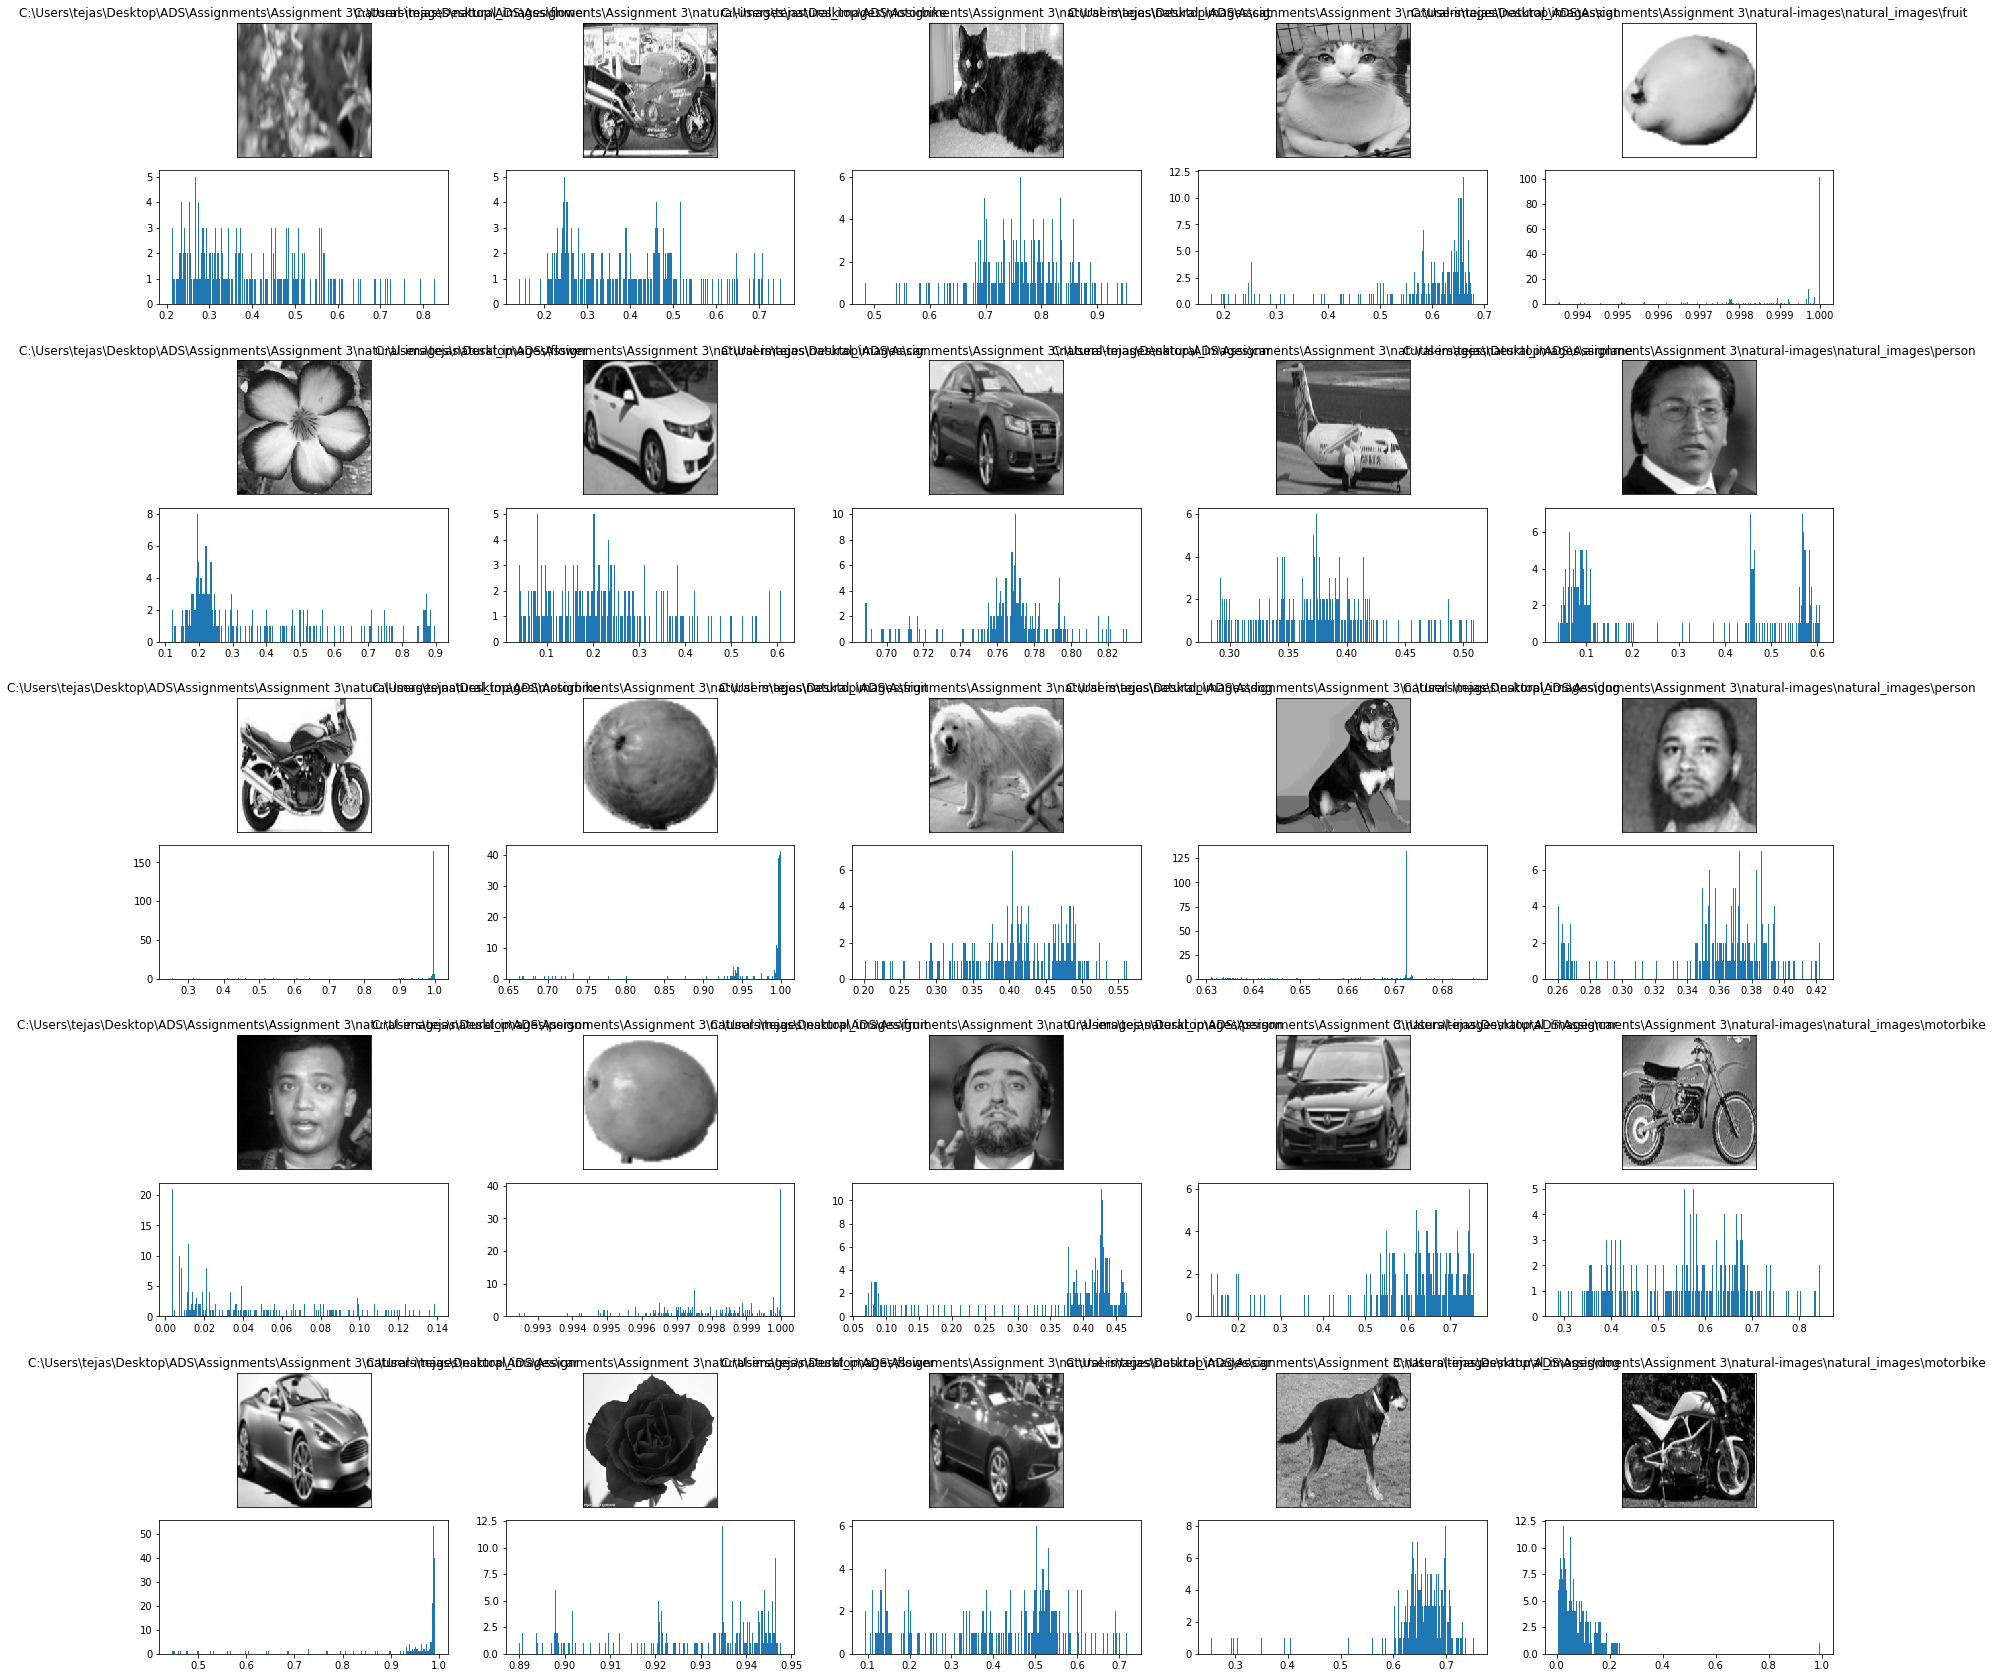

In [0]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)
s=0
for i,k in zip(plot_images,plot_labels):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[s], wspace=0.1, hspace=0.1)
    s+=1
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(i,cmap='gray')
            ax.set_title(k)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.hist(i[0],bins=256,histtype='bar')
            fig.add_subplot(ax)
            

fig.show()

In [0]:
image_list = np.array(image_list)
labels = np.array(labels)

In [0]:
image_list = image_list.reshape(image_list.shape[0],image_list.shape[1],image_list.shape[2],1)

In [0]:
le = preprocessing.LabelEncoder()

le.fit(labels)

encoded_label = le.transform(labels)

# Dividing dataset into Train and Test 

In [0]:
image_list.shape

(6899, 200, 200, 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(image_list, encoded_label, test_size=0.1, random_state=0)

In [0]:
X_train.shape

(6209, 200, 200, 1)

In [0]:
X_test.shape

(690, 200, 200, 1)

In [0]:
input_shape = (image_list[0].shape[0],image_list[0].shape[1],1)

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model = models.Sequential()
Model.add(Conv2D(8,(5,5),activation = 'relu',input_shape=input_shape))
Model.add(BatchNormalization())
Model.add(Conv2D(16,(5,5),activation = 'relu'))
Model.add(MaxPooling2D(5,5))
Model.add(Conv2D(24,(3,3),activation = 'relu'))
Model.add(Conv2D(32,(3,3),activation = 'relu'))
Model.add(MaxPooling2D(3,3))
Model.add(Flatten())
Model.add(Dense(32, activation='relu'))
Model.add(Dropout(0.3))
Model.add(Dense(32, activation='relu'))
Model.add(Dense(16, activation='relu'))
Model.add(Dense(16, activation='relu'))
Model.add(Dense(8,activation='softmax'))

# Building and Tuning the model

# Basic Model

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
#callbacks
#Best Save Callback
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#Stop Model training in case of no Improvement
early_stop=EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto', baseline=None, restore_best_weights=False)
# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)
callbacks_list = [checkpoint,early_stop,reduce_lr]

In [0]:
trained = model.fit(X_train, y_train,epochs=2,verbose=1,validation_split=0.30,callbacks=callbacks_list)

Train on 4346 samples, validate on 1863 samples
Epoch 1/2
4346/4346 [==============================] - 31s 7ms/step - loss: 3.8375 - accuracy: 0.2740 - val_loss: 1.7658 - val_accuracy: 0.3194

Epoch 00001: val_accuracy improved from -inf to 0.31938, saving model to weights.best.hdf5
Epoch 2/2
4346/4346 [==============================] - 30s 7ms/step - loss: 1.8188 - accuracy: 0.2835 - val_loss: 1.7227 - val_accuracy: 0.3333

Epoch 00002: val_accuracy improved from 0.31938 to 0.33333, saving model to weights.best.hdf5


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               10240256  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2056      
Total params: 10,242,312
Trainable params: 10,242,312
Non-trainable params: 0
_________________________________________________________________


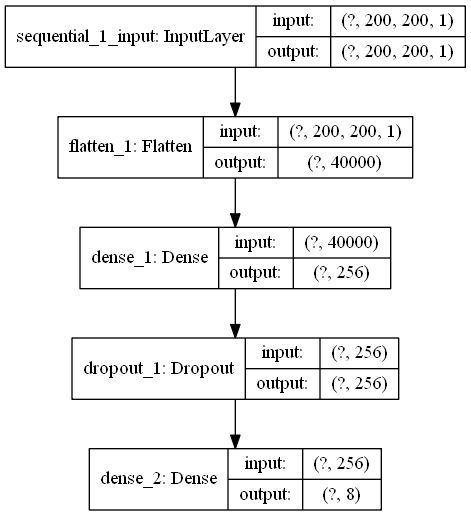

In [0]:
model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

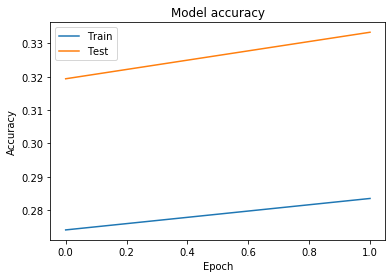

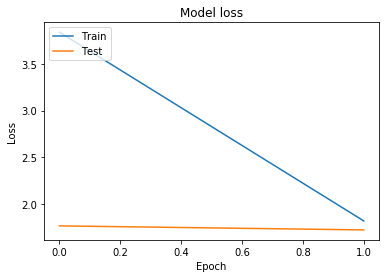

In [0]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

# Function Declarations

In [0]:
def compile():
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [0]:
def summery():
    model.summary()
    SVG(model_to_dot(model).create(prog='dot', format='svg'))
    Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [0]:
def new():
    plot.plot(trained.history['accuracy'])
    plot.plot(trained.history['val_accuracy'])
    plot.title('Model accuracy')
    plot.ylabel('Accuracy')
    plot.xlabel('Epoch')
    plot.legend(['Train', 'Valid'], loc='upper left')
    plot.show()

    plot.plot(trained.history['loss'])
    plot.plot(trained.history['val_loss'])
    plot.title('Model loss')
    plot.ylabel('Loss')
    plot.xlabel('Epoch')
    plot.legend(['Train', 'Valid'], loc='upper left')
    plot.show()

In [0]:
def train_model():
    trained = model.fit(X_train, y_train,epochs=2,verbose=1,validation_split=0.30,callbacks=callbacks_list)

# Part B: Activation Functions (relu, tahn and softmax)

# Model 2

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [0]:
compile()

In [0]:
trained = model.fit(X_train, y_train,epochs=2,verbose=1,validation_split=0.30,callbacks=callbacks_list)

Train on 4346 samples, validate on 1863 samples
Epoch 1/2
4346/4346 [==============================] - 248s 57ms/step - loss: 0.2711 - accuracy: 0.9061 - val_loss: 0.4155 - val_accuracy: 0.8449

Epoch 00001: val_accuracy improved from 0.82823 to 0.84487, saving model to weights.best.hdf5
Epoch 2/2
4346/4346 [==============================] - 239s 55ms/step - loss: 0.1434 - accuracy: 0.9521 - val_loss: 0.4939 - val_accuracy: 0.8438

Epoch 00002: val_accuracy did not improve from 0.84487


In [0]:
summery()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

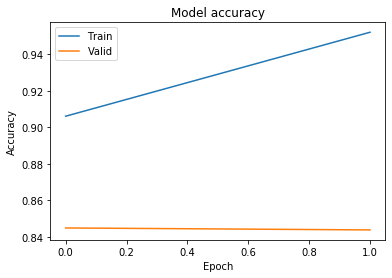

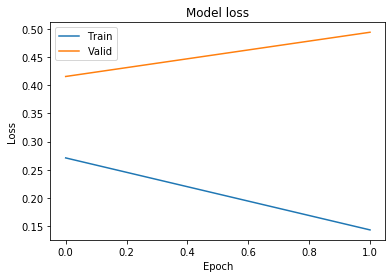

In [0]:
new()

# Model 3

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

Train on 4346 samples, validate on 1863 samples
Epoch 1/1
4346/4346 [==============================] - 222s 51ms/step - loss: 0.8198 - accuracy: 0.7260 - val_loss: 0.4127 - val_accuracy: 0.8529

Epoch 00001: val_accuracy improved from 0.84487 to 0.85293, saving model to weights.best.hdf5
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          

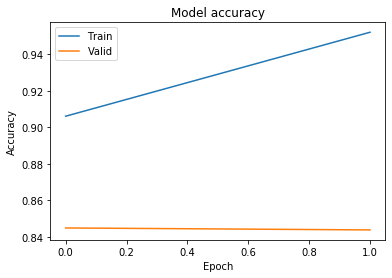

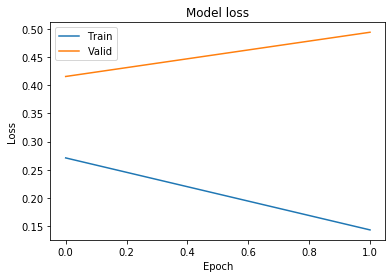

In [0]:
compile()
train_model()
summery()
new()

# Part C: Cost Functions (mean-square error and hinge)

# Model 4

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_hinge,optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

Train on 4346 samples, validate on 1863 samples
Epoch 1/1
4346/4346 [==============================] - 233s 54ms/step - loss: 1.3495 - accuracy: 0.1364 - val_loss: 1.0492 - val_accuracy: 0.1202

Epoch 00001: val_accuracy did not improve from 0.85293
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 48, 48, 64)        0         
__

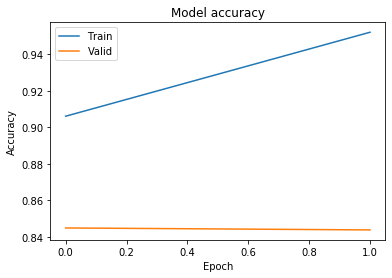

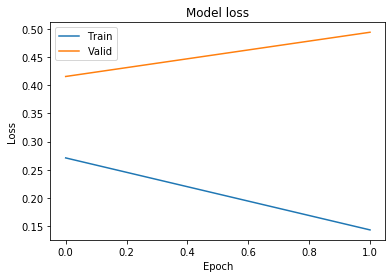

In [0]:
train_model()
summery()
new()

# Part D: different number of epochs

# Model 5

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

In [0]:
compile()

In [0]:
trained = model.fit(X_train, y_train,epochs=1,verbose=1,validation_split=0.30,callbacks=callbacks_list)

Train on 4346 samples, validate on 1863 samples
Epoch 1/1
4346/4346 [==============================] - 269s 62ms/step - loss: 1.4567 - accuracy: 0.5985 - val_loss: 0.5510 - val_accuracy: 0.7992

Epoch 00001: val_accuracy did not improve from 0.85293


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)              

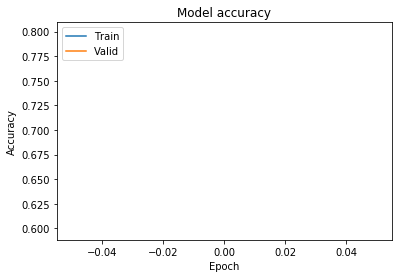

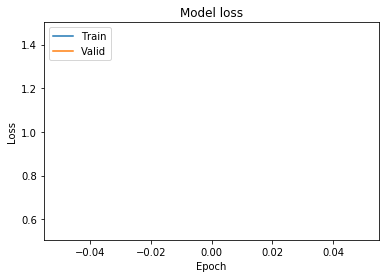

In [0]:
summery()
new()

# Part E: Gradient estimation (ADAM, Adadelta)

# Model 6

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.mse,optimizer=keras.optimizers.Adadelta(learning_rate=0.001),metrics=['accuracy'])

Train on 4346 samples, validate on 1863 samples
Epoch 1/1
4346/4346 [==============================] - 298s 69ms/step - loss: 0.1096 - accuracy: 0.1526 - val_loss: 0.1085 - val_accuracy: 0.1637

Epoch 00001: val_accuracy did not improve from 0.85293
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 48, 48, 64)        0         
__

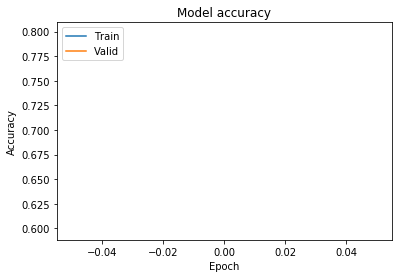

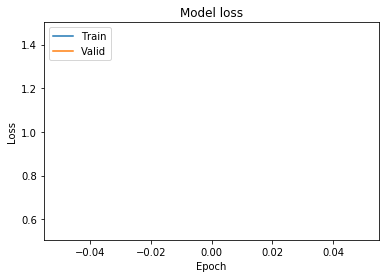

In [0]:
train_model()
summery()
new()

# Part F: different Network Architecture

# Model 7

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5),activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

Train on 4346 samples, validate on 1863 samples
Epoch 1/1
4346/4346 [==============================] - 295s 68ms/step - loss: 0.9991 - accuracy: 0.7048 - val_loss: 0.4717 - val_accuracy: 0.8250

Epoch 00001: val_accuracy did not improve from 0.85293
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 48, 48, 64)        0         
__

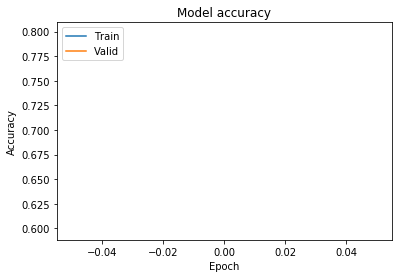

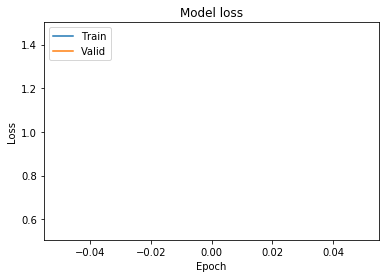

In [0]:
compile()
train_model()
summery()
new()

# Part G: Network Initialization (Uniform and zeros)

# Model 8

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), kernel_initializer='random_uniform',activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

Train on 4346 samples, validate on 1863 samples
Epoch 1/2
4346/4346 [==============================] - 296s 68ms/step - loss: 0.8790 - accuracy: 0.7115 - val_loss: 0.4937 - val_accuracy: 0.8239

Epoch 00001: val_accuracy did not improve from 0.85293
Epoch 2/2
4346/4346 [==============================] - 366s 84ms/step - loss: 0.2477 - accuracy: 0.9160 - val_loss: 0.5273 - val_accuracy: 0.8111

Epoch 00002: val_accuracy did not improve from 0.85293
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 96, 96, 64)        18496     
________________________________________________________________

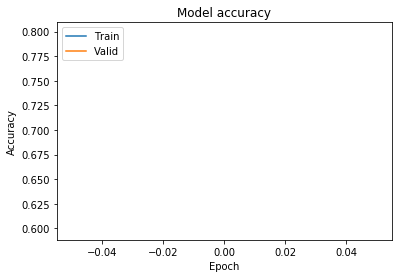

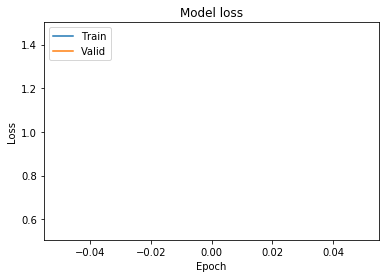

In [0]:
compile()
train_model()
summery()
new()

# Model 9

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), kernel_initializer='zeros',activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

Train on 4346 samples, validate on 1863 samples
Epoch 1/2
4346/4346 [==============================] - 551s 127ms/step - loss: 2.0727 - accuracy: 0.1521 - val_loss: 2.0770 - val_accuracy: 0.1245

Epoch 00001: val_accuracy did not improve from 0.85293
Epoch 2/2
4346/4346 [==============================] - 1245s 286ms/step - loss: 2.0714 - accuracy: 0.1452 - val_loss: 2.0758 - val_accuracy: 0.1455

Epoch 00002: val_accuracy did not improve from 0.85293
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 96, 96, 64)        18496     
_____________________________________________________________

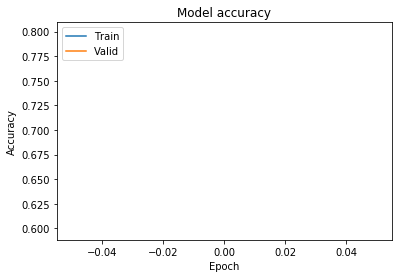

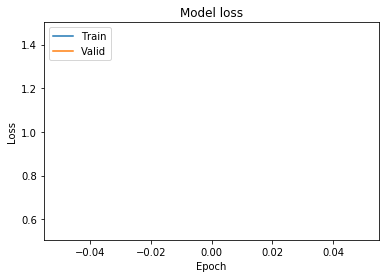

In [0]:
compile()
train_model()
summery()
new()

# Testing on the Test data

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
#callbacks
#Best Save Callback
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#Stop Model training in case of no Improvement
early_stop=EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto', baseline=None, restore_best_weights=False)
# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)
callbacks_list = [checkpoint,early_stop,reduce_lr]

In [0]:
trained = model.fit(X_train, y_train,epochs=2,verbose=1,validation_split=0.30,callbacks=callbacks_list)

Train on 4346 samples, validate on 1863 samples
Epoch 1/2
4346/4346 [==============================] - 552s 127ms/step - loss: 1.5610 - accuracy: 0.5391 - val_loss: 0.5454 - val_accuracy: 0.8089

Epoch 00001: val_accuracy improved from -inf to 0.80891, saving model to weights.best.hdf5
Epoch 2/2
4346/4346 [==============================] - 530s 122ms/step - loss: 0.4274 - accuracy: 0.8573 - val_loss: 0.5968 - val_accuracy: 0.7950

Epoch 00002: val_accuracy did not improve from 0.80891


In [0]:
evaluation = model.evaluate(X_test,y_test, verbose=1)

print("Testing Accuracy: {0}\nTesting Loss: {1}".format(evaluation[0],evaluation))

690/690 [==============================] - 33s 48ms/step
Testing Accuracy: 0.4882011864496314
Testing Loss: [0.4882011864496314, 0.8202898502349854]


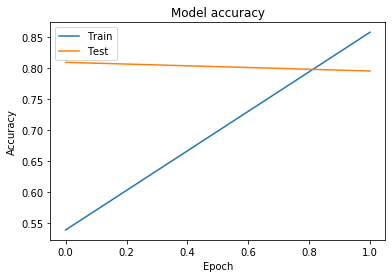

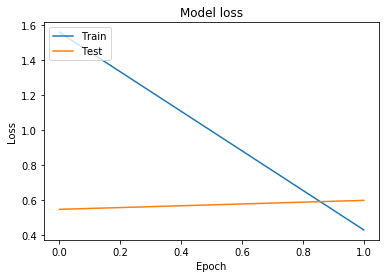

In [0]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


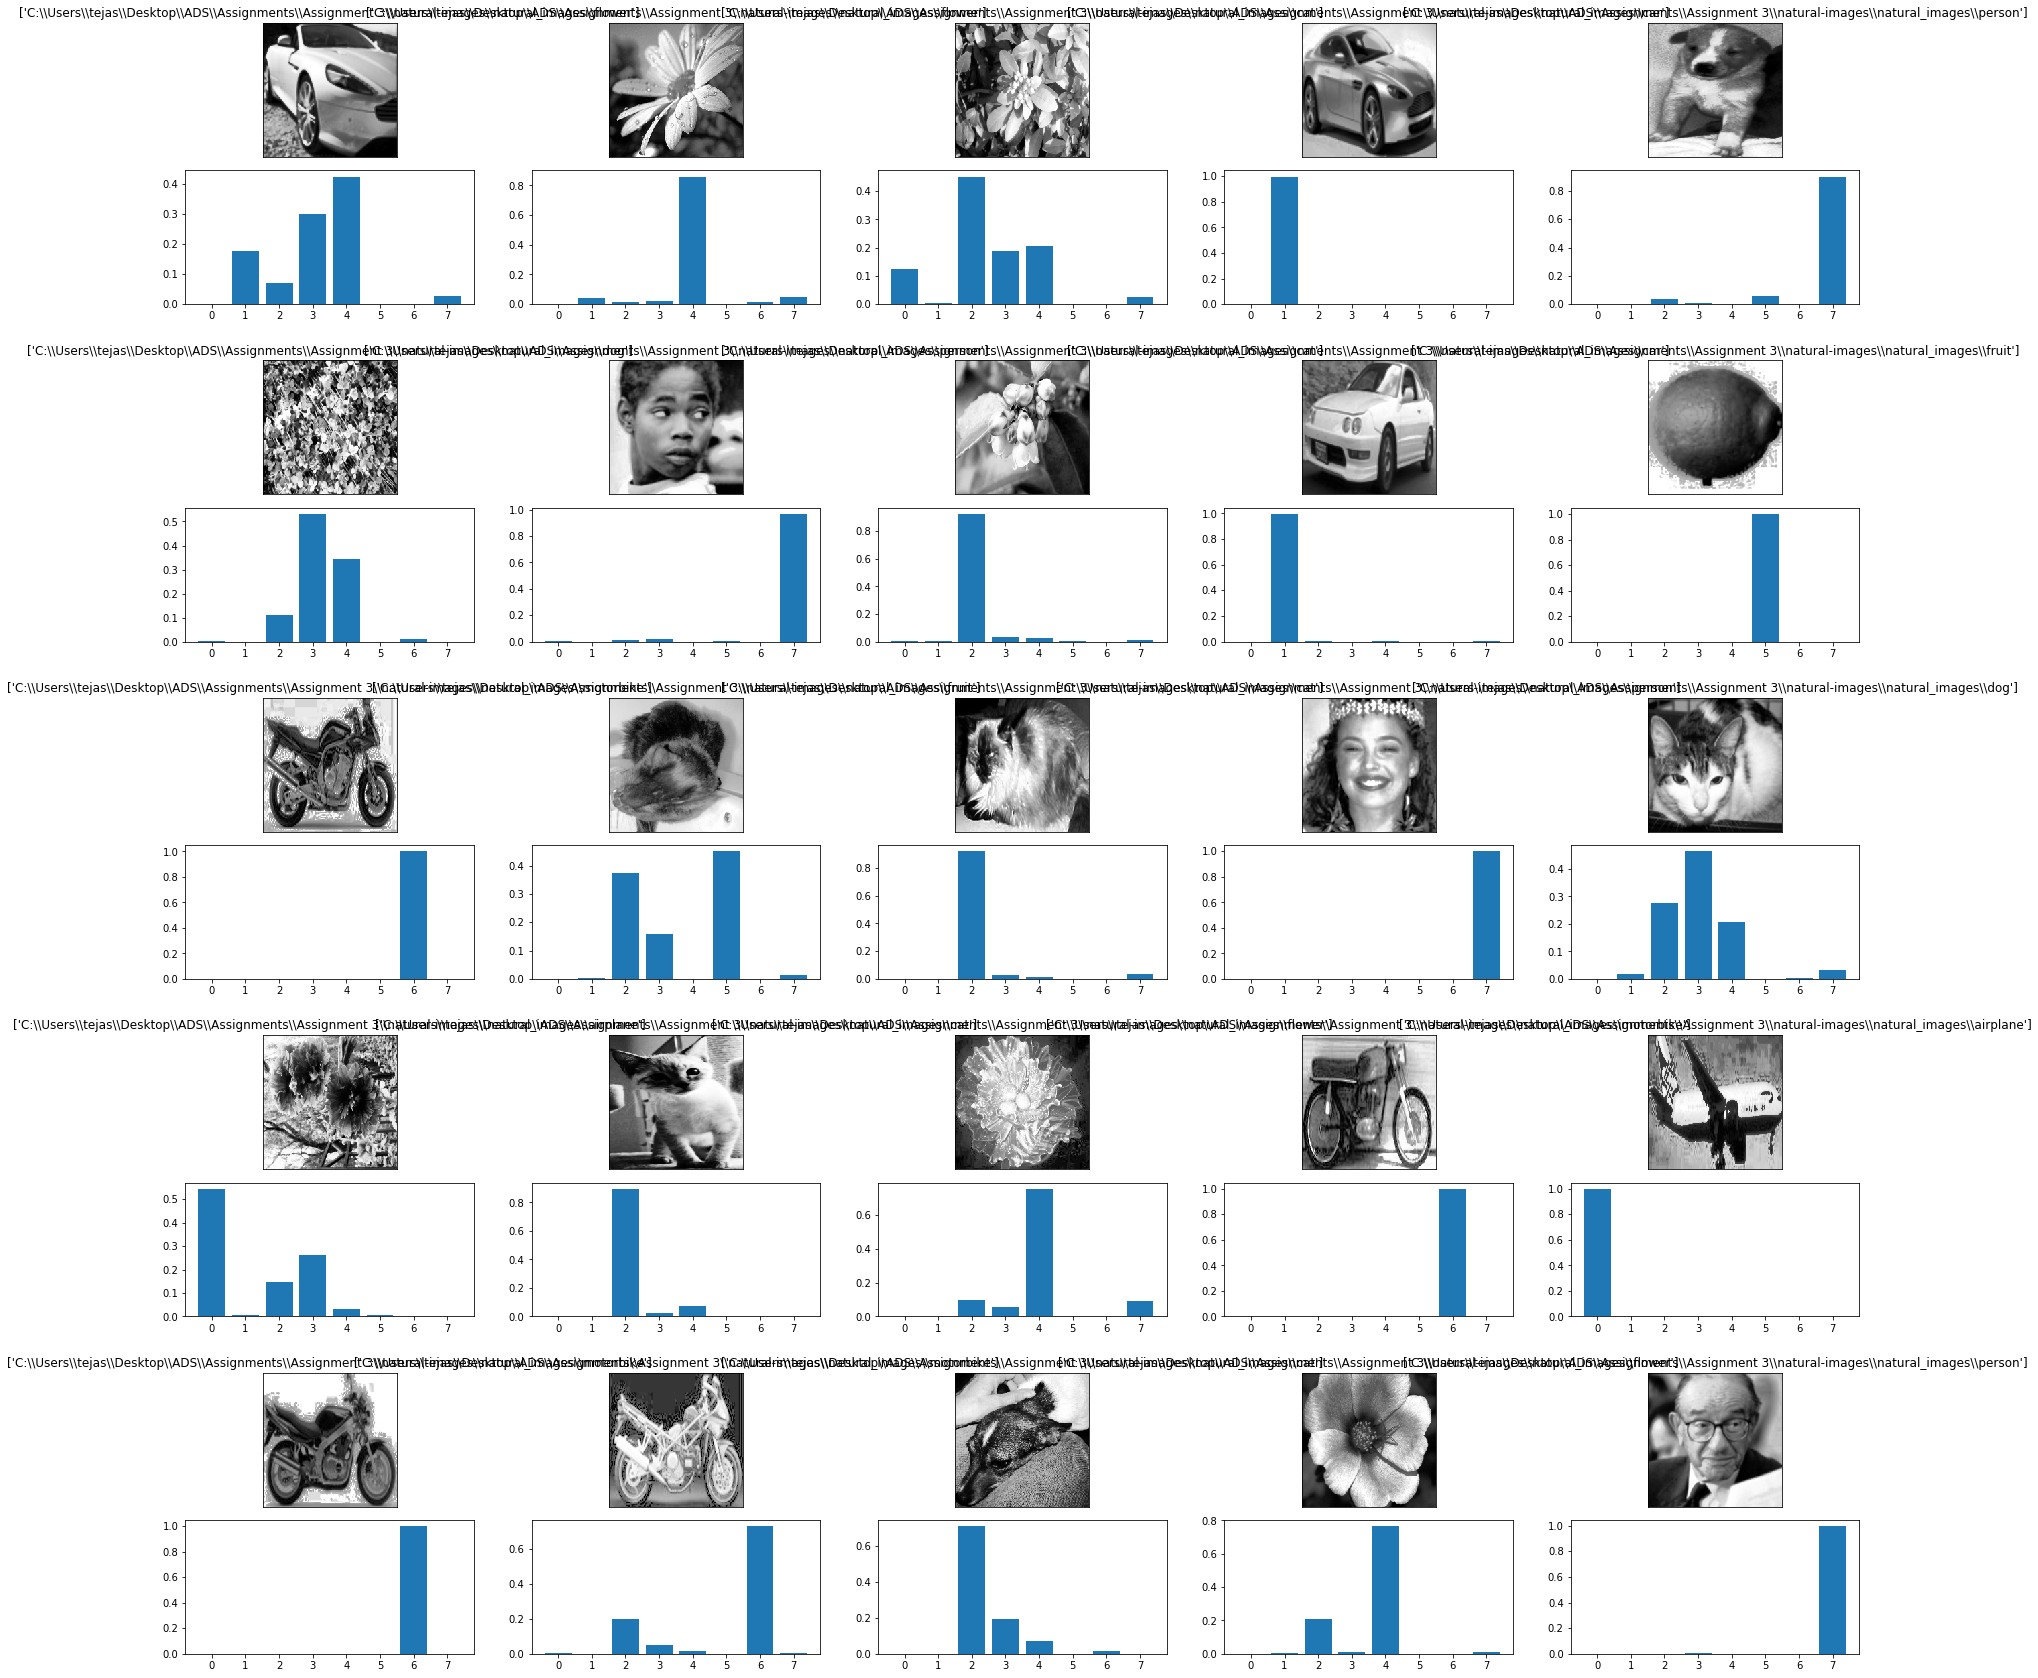

In [0]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(X_test))
    pred_image = np.array([X_test[rnd_number]]) 
    pred_class = le.inverse_transform([model.predict_classes(pred_image)[0]])
    pred_prob = model.predict(pred_image).reshape(8)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0].reshape(200,200),cmap='gray')
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5,6,7],pred_prob)
            fig.add_subplot(ax)

fig.show()


# Conclusion

Learned how Convolutional Neural Network works. How we can improve the validation accuracy using different Activation Functions, Cost Functions, Network Architecture and different number of epochs. The accuracy of basic was 0.33678 and we got the Test accuracy as 0.56

# Citations


https://www.kaggle.com/mgmarques/cnn-exercise-deep-learning-for-computer-vision


https://www.kaggle.com/venugopalvasarla/using-basic-cnn-for-natural-image-classification


https://www.kaggle.com/uzairrj/beg-cnn-natural-image-classification-85-acc

# License

Copyright 2020 Tejaswini Talekar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE